In [ ]:
# import the needed libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
##kaggle dataset

historical_polls = pd.read_csv("/Users/priyalsharma/Desktop/pres_pollaverages_1968-2016.csv")
historical_polls['state'] = historical_polls['state'].str.lower()

# Define a function to extract the last name
def extract_last_name(full_name):
    # Split the full name by comma
    parts = full_name.split(',')
    # Get the first part, then split by spaces and take the last part
    last_name = parts[0].split()[-1]
    return last_name.strip()  # Strip any leading/trailing spaces

# Apply the function to the 'Name' column
historical_polls['candidate_name'] = historical_polls['candidate_name'].apply(extract_last_name)
historical_polls['candidate_name'] = historical_polls['candidate_name'].str.lower()


In [32]:
 election_results = pd.read_csv("/Users/priyalsharma/Desktop/1976-2020-president.csv")

In [34]:
(election_results).head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [36]:
election_results['pct'] = election_results['candidatevotes'] / election_results['totalvotes']

election_results['state'] = election_results['state'].str.lower()


# Define a function to extract the part before the comma
def extract_last_name(full_name):
     if isinstance(full_name, str):
        return full_name.split(',')[0]
     else:
        return ""

# Apply the function to the 'Name' column
election_results['candidate'] = election_results['candidate'].apply(extract_last_name)
election_results['candidate'] = election_results['candidate'].str.lower()

election_results.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,pct
0,1976,alabama,AL,1,63,41,US PRESIDENT,carter,DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,0.557273
1,1976,alabama,AL,1,63,41,US PRESIDENT,ford,REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,0.426149
2,1976,alabama,AL,1,63,41,US PRESIDENT,maddox,AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,0.007776
3,1976,alabama,AL,1,63,41,US PRESIDENT,bubar,PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,0.005638
4,1976,alabama,AL,1,63,41,US PRESIDENT,hall,COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,0.001652


In [39]:
# merge dataframes on year, state, party
election_polls_vs_results = pd.merge(historical_polls, election_results, left_on=['candidate_name','state','cycle'], right_on=['candidate','state','year'], how='inner')
election_polls_vs_results = election_polls_vs_results[['cycle','state','candidate_name','modeldate','pct_estimate','pct_trend_adjusted','party_simplified','pct']]

election_polls_vs_results['pct_estimate'] = election_polls_vs_results['pct_estimate'].fillna(0)/100
election_polls_vs_results.head()


,cycle,state,candidate_name,modeldate,pct_estimate,pct_trend_adjusted,party_simplified,pct
0,2016,alabama,trump,3/3/2016,0.701114,68.63747,REPUBLICAN,0.620831
1,2016,alabama,trump,3/4/2016,0.701115,68.40449,REPUBLICAN,0.620831
2,2016,alabama,trump,3/5/2016,0.701122,68.20728,REPUBLICAN,0.620831
3,2016,alabama,trump,3/6/2016,0.701128,68.36120,REPUBLICAN,0.620831
4,2016,alabama,trump,3/7/2016,0.701136,68.23286,REPUBLICAN,0.620831


/var/folders/wm/c44cygks2k5btdymtm_rr5sw0000gn/T/ipykernel_27262/77629456.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x, y, vmin=0, vmax=1)


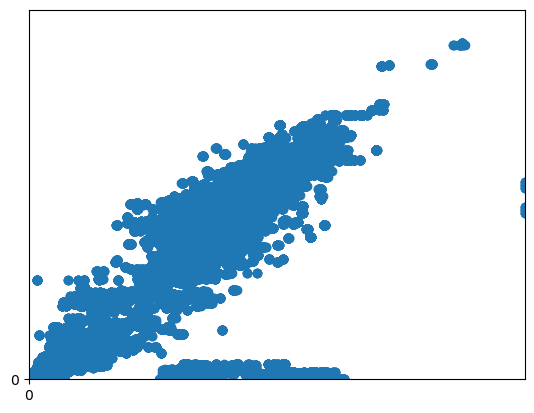

In [41]:
x = election_polls_vs_results['pct_estimate']
y = election_polls_vs_results['pct'].fillna(0)

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=1)

ax.set(xlim=(0, 1), xticks=np.arange(0,0.1),
       ylim=(0, 1), yticks=np.arange(0,0.1))

plt.show()

In [43]:
from sklearn.metrics import r2_score

r_squared = r2_score(x, y)

print("R-squared value:", r_squared)

R-squared value: 0.44212739983925675


In [45]:
election_pvr_cleaned =  election_polls_vs_results[election_polls_vs_results['pct_estimate'] < election_polls_vs_results['pct']*5]

election_pvr_cleaned['pct_estimate'] = election_pvr_cleaned['pct_estimate'].apply(pd.to_numeric, errors='coerce')

election_pvr_cleaned = election_pvr_cleaned[(election_pvr_cleaned['pct_estimate'] <= 0.9)]

/var/folders/wm/c44cygks2k5btdymtm_rr5sw0000gn/T/ipykernel_27262/3994914886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_pvr_cleaned['pct_estimate'] = election_pvr_cleaned['pct_estimate'].apply(pd.to_numeric, errors='coerce')


/var/folders/wm/c44cygks2k5btdymtm_rr5sw0000gn/T/ipykernel_27262/2493517617.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x, y, vmin=0, vmax=1)


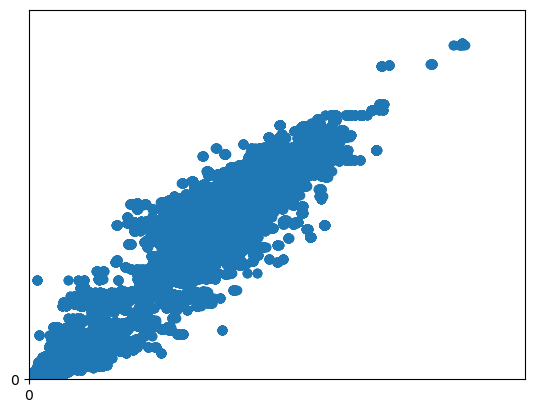

In [47]:
x = election_pvr_cleaned['pct_estimate']
y = election_pvr_cleaned['pct'].fillna(0)

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=1)

ax.set(xlim=(0, 1), xticks=np.arange(0,0.1),
       ylim=(0, 1), yticks=np.arange(0,0.1))

plt.show()


In [49]:
r_squared = r2_score(x, y)

print("R-squared value:", r_squared)

R-squared value: 0.7447821095758543


In [51]:
election_pvr_cleaned

,cycle,state,candidate_name,modeldate,pct_estimate,pct_trend_adjusted,party_simplified,pct
0,2016,alabama,trump,3/3/2016,0.701114,68.637470,REPUBLICAN,0.620831
1,2016,alabama,trump,3/4/2016,0.701115,68.404490,REPUBLICAN,0.620831
2,2016,alabama,trump,3/5/2016,0.701122,68.207280,REPUBLICAN,0.620831
3,2016,alabama,trump,3/6/2016,0.701128,68.361200,REPUBLICAN,0.620831
4,2016,alabama,trump,3/7/2016,0.701136,68.232860,REPUBLICAN,0.620831
...,...,...,...,...,...,...,...,...
208998,1976,maine,ford,11/2/1976,0.417066,41.532132,REPUBLICAN,0.489308
208999,1976,maine,carter,10/30/1976,0.392438,39.243782,DEMOCRAT,0.480941
209000,1976,maine,carter,10/31/1976,0.392877,39.343189,DEMOCRAT,0.480941
209001,1976,maine,carter,11/1/1976,0.392877,39.343189,DEMOCRAT,0.480941


In [53]:
# Machine Learning

# Make prediction of actual pct based on predicted pct

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [55]:
X = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Linear Regression in this example)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.003332004199579647


In [ ]:
##LETS see if our model can predict the 2020 election

In [59]:
polls_2020 = pd.read_csv("/Users/priyalsharma/Desktop/presidential_poll_averages_2020.csv")
polls_2020.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101


In [63]:
def extract_last_name(full_name):
    # Split the full name by whitespace
    parts = full_name.split()
    # Exclude suffixes like "Jr.", "Sr.", etc., if present
    if parts[-1] in ['Jr.', 'Sr.', 'II', 'III', 'IV']:
        last_name = parts[-2]  # Take the second last part as the last name
    else:
        last_name = parts[-1]  # Otherwise, take the last part as the last name
    return last_name

# Apply the function to the 'Name' column
polls_2020['candidate_name'] = polls_2020['candidate_name'].apply(extract_last_name)

# Lowercase the 'candidate_name' column
polls_2020['candidate_name'] = polls_2020['candidate_name'].str.lower()


In [65]:
polls_2020.head()
x_2020 = np.array(polls_2020['pct_estimate']).reshape(-1,1)
pred_2020 = model.predict(x_2020)
polls_2020['pred_pct'] = pred_2020/100
polls_2020['state'] = polls_2020['state'].str.lower()
actual_2020 = election_results[election_results['year'] == 2020 ]
actual_2020

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,pct
3740,2020,alabama,AL,1,63,41,US PRESIDENT,biden,DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT,0.365700
3741,2020,alabama,AL,1,63,41,US PRESIDENT,trump,REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN,0.620316
3742,2020,alabama,AL,1,63,41,US PRESIDENT,jorgensen,LIBERTARIAN,False,25176,2323282,20210113,NaN,LIBERTARIAN,0.010836
3743,2020,alabama,AL,1,63,41,US PRESIDENT,,NaN,True,7312,2323282,20210113,NaN,OTHER,0.003147
3744,2020,alaska,AK,2,94,81,US PRESIDENT,biden,DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT,0.427720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,wyoming,WY,56,83,68,US PRESIDENT,jorgensen,LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN,0.020711
4283,2020,wyoming,WY,56,83,68,US PRESIDENT,pierce,INDEPENDENT,False,2208,278503,20210113,NaN,OTHER,0.007928
4284,2020,wyoming,WY,56,83,68,US PRESIDENT,,NaN,True,1739,278503,20210113,NaN,OTHER,0.006244
4285,2020,wyoming,WY,56,83,68,US PRESIDENT,overvotes,NaN,False,279,278503,20210113,NaN,OTHER,0.001002


In [67]:
actual_vs_predicted_2020_elections = pd.merge(polls_2020, actual_2020, left_on=['candidate_name','state','cycle'], right_on=['candidate','state','year'], how='inner')
actual_vs_predicted_2020_elections['Net pred pct'] = actual_vs_predicted_2020_elections['pct'] - actual_vs_predicted_2020_elections['pred_pct']
actual_vs_predicted_2020_elections.head()
sum_net_pred = actual_vs_predicted_2020_elections['Net pred pct'].sum()
avg_net_pred = sum_net_pred/26924 
avg_net_pred

0.00011884057140157393

In [69]:
# Who would win in 2020 according to our model?

# 1) sum all state/candidate-name pred_pct and take average

# 2) multiply winner of each state by electoral college votes
predicted_2020_averages = actual_vs_predicted_2020_elections.groupby(['state', 'candidate_name']).agg({'pred_pct': 'mean'})
predicted_2020_averages.reset_index(inplace=True)
predicted_2020_averages
pred_2020_election = predicted_2020_averages.pivot_table(index='state', columns='candidate_name', values='pred_pct')
pred_2020_election.reset_index(inplace=True)

In [81]:
polls_2024 = pd.read_csv("/Users/priyalsharma/Desktop/president_polls.csv")

In [83]:
biden_2024 = polls_2024[(polls_2024['candidate_name']=='Joe Biden')]
trump_2024 = polls_2024[(polls_2024['candidate_name']=='Donald Trump')]

In [85]:
polls_2024['state'] = polls_2024['state'].replace("Maine CD-1",'Maine')
polls_2024['state'] = polls_2024['state'].replace("Maine CD-2",'Maine')

average_polls_2024 = polls_2024.groupby(['poll_id', 'candidate_name','state']).agg({'pct': 'mean'})
# Reset index to make 'poll_id' and 'candidate_name' columns again
average_polls_2024.reset_index(inplace=True)
average_polls_2024

,poll_id,candidate_name,state,pct
0,74706,Donald Trump,Missouri,53.00
1,74706,Joe Biden,Missouri,38.00
2,74928,Donald Trump,New Hampshire,43.00
3,74928,Joe Biden,New Hampshire,51.00
4,75009,Donald Trump,Arizona,44.00
...,...,...,...,...
774,84547,Joe Biden,Wisconsin,41.75
775,84547,Kamala Harris,Wisconsin,46.00
776,84547,Nikki Haley,Wisconsin,52.50
777,84547,Robert F. Kennedy,Wisconsin,21.50


In [87]:
pct_polls_24 = np.array(average_polls_2024['pct']).reshape(-1,1)

In [89]:
pred_2024 = model.predict(pct_polls_24)
average_polls_2024['pred_pct'] = pred_2024
average_polls_2024

,poll_id,candidate_name,state,pct,pred_pct
0,74706,Donald Trump,Missouri,53.00,57.365595
1,74706,Joe Biden,Missouri,38.00,41.130741
2,74928,Donald Trump,New Hampshire,43.00,46.542359
3,74928,Joe Biden,New Hampshire,51.00,55.200947
4,75009,Donald Trump,Arizona,44.00,47.624682
...,...,...,...,...,...
774,84547,Joe Biden,Wisconsin,41.75,45.189454
775,84547,Kamala Harris,Wisconsin,46.00,49.789329
776,84547,Nikki Haley,Wisconsin,52.50,56.824433
777,84547,Robert F. Kennedy,Wisconsin,21.50,23.272401


In [91]:
biden_count = average_polls_2024[average_polls_2024['candidate_name'] == 'Joe Biden']
trump_count = average_polls_2024[average_polls_2024['candidate_name'] == 'Donald Trump']

biden_count = biden_count.groupby(['candidate_name','state']).agg({'pred_pct': 'mean'})
biden_count.reset_index(inplace=True)

trump_count = trump_count.groupby(['candidate_name','state']).agg({'pred_pct': 'mean'})
trump_count.reset_index(inplace=True)

biden_count.head()

,candidate_name,state,pred_pct
0,Joe Biden,Alabama,34.636799
1,Joe Biden,Alaska,37.342608
2,Joe Biden,Arizona,45.843809
3,Joe Biden,Arkansas,30.523969
4,Joe Biden,California,61.169189


In [93]:
trump_count.head()
pred_2024_results = pd.merge(on='state',left=biden_count,right=trump_count,how="inner")
pred_2024_results['winner'] = pred_2024_results.apply(lambda row: row['candidate_name_x'] if row['pred_pct_x'] > row['pred_pct_y'] else row['candidate_name_y'], axis=1)

# Display the DataFrame with the winners
pred_2024_results.head()

,candidate_name_x,state,pred_pct_x,candidate_name_y,pred_pct_y,winner
0,Joe Biden,Alabama,34.636799,Donald Trump,61.694889,Donald Trump
1,Joe Biden,Alaska,37.342608,Donald Trump,45.460035,Donald Trump
2,Joe Biden,Arizona,45.843809,Donald Trump,48.850414,Donald Trump
3,Joe Biden,Arkansas,30.523969,Donald Trump,62.019586,Donald Trump
4,Joe Biden,California,61.169189,Donald Trump,31.745449,Joe Biden


In [97]:
electoral_votes = pd.read_csv("/Users/priyalsharma/Desktop/2024_Electoral_College.csv")
electoral_votes.head()
votes = pd.merge(left_on='state', right_on='State',left=pred_2024_results,right=electoral_votes,how="inner")
votes.head()

,candidate_name_x,state,pred_pct_x,candidate_name_y,pred_pct_y,winner,State,Abbreviation,Total
0,Joe Biden,Alabama,34.636799,Donald Trump,61.694889,Donald Trump,Alabama,AL,9
1,Joe Biden,Alaska,37.342608,Donald Trump,45.460035,Donald Trump,Alaska,AK,3
2,Joe Biden,Arizona,45.843809,Donald Trump,48.850414,Donald Trump,Arizona,AZ,11
3,Joe Biden,Arkansas,30.523969,Donald Trump,62.019586,Donald Trump,Arkansas,AR,6
4,Joe Biden,California,61.169189,Donald Trump,31.745449,Joe Biden,California,CA,54


In [100]:
votes = pd.merge(left_on='state', right_on='State',left=pred_2024_results,right=electoral_votes,how="inner")
votes.head()
# Add all rows where biden wins, and all rows where trump wins
biden_votes = votes[votes['winner'] == 'Joe Biden']

# Sum the votes column for the filtered DataFrame
biden_electoral = biden_votes['Total'].sum()

trump_votes = votes[votes['winner'] == 'Donald Trump']

# Sum the votes column for the filtered DataFrame
trump_electoral = trump_votes['Total'].sum()

print(biden_electoral)
print(trump_electoral)

243
268


In [ ]:
##our model predicts that trump will win!